In [1]:
import time
import struct 

import numpy as np
import matplotlib.pyplot as plt

from ymaeda_tools.read_snapshot import read_snapshot_params, snapshot_stnloc, snapshot_XYZ, extract_snapshot

# This notebook performs checks on the creation of the Green's functions associated with a specific
# source location, observation location and direction of motion.

df = 0.002441406 # frequency step size used by YMAEDA_TOOLS
f = np.arange(0, df * 2049, df) # frequency half space
F = np.arange(0, df * 4096, df) # frequency full space

# location to measure the Green's function:
X = -10900
Y = -121100
Z = 1000

HDD_LOC = "/Volumes/MAC Backup/Final Year Projects/Shinmoedake Data/EIC_BACKUP/home/natsume/" 

STATIONS = ["SMN_EW_SMALL", "SMN_NS_SMALL", "SMN_UD_SMALL"]

GREENS_FUNCTION = "pow34"

t = []
g = []

for i, STATION in enumerate(STATIONS):
    if GREENS_FUNCTION == 'pow5':
        #print('pow5 chosen...')
        snapshot_dir = HDD_LOC + "GFpow5/" + STATION + "/PML/snapshot/"
    elif GREENS_FUNCTION == 'pow34':
        #print('pow34 chosen...')
        snapshot_dir = HDD_LOC + "GFpow34/" + STATION + "/PML/snapshot/"
    elif GREENS_FUNCTION == 'cos':
        #print('cos chosen...')
        snapshot_dir = HDD_LOC + "GFcos/" + STATION + "/PML/snapshot/"
    
    # First of all we need to load the 3 components of the Green's function measured at the wanted location...
    start_time = time.time()
    t_tmp, g_tmp, N, x0, dx = extract_snapshot(snapshot_dir, X, Y, Z, return_params = True)
    print("{:.2f}s".format(time.time() - start_time))
    
    t.append(t_tmp)
    g.append(g_tmp)

t = np.array(t)
g = np.array(g)
dx = np.array(dx)
N = np.array(N)
x0 = np.array(x0)

119.07s
116.38s
100.73s


In [2]:
print("np.shape(t)", np.shape(t))
print("np.shape(g)", np.shape(g))
print("N", N)
print("x0", x0)
print("dx", dx)

np.shape(t) (3, 121)
np.shape(g) (3, 121, 3)
N [[161 160 140]
 [160 161 140]
 [160 160 141]]
x0 [[-1.18000e+04 -1.21495e+05  5.00000e+00]
 [-1.17950e+04 -1.21500e+05  5.00000e+00]
 [-1.17950e+04 -1.21495e+05  0.00000e+00]]
dx [[10. 10. 10.]
 [10. 10. 10.]
 [10. 10. 10.]]


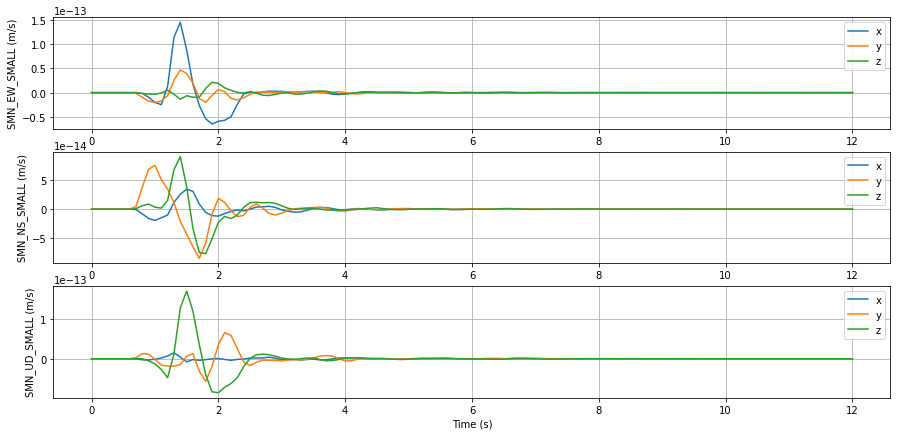

In [3]:
plt.figure(figsize = (15, 7))
plt.subplot(3, 1, 1)
plt.plot(t[0], g[0, :, 0], t[0], g[0, :, 1], t[0], g[0, :, 2]) # 3D GF due to SMN_EW force
plt.legend(["x", "y", "z"])
plt.ylabel("{} (m/s)".format(STATIONS[0]))
plt.grid(True)
plt.subplot(3, 1, 2)
plt.plot(t[1], g[1, :, 0], t[1], g[1, :, 1], t[1], g[1, :, 2]) # 3D GF due to SMN_NS force
plt.legend(["x", "y", "z"])
plt.ylabel("{} (m/s)".format(STATIONS[1]))
plt.grid(True)
plt.subplot(3, 1, 3)
plt.plot(t[2], g[2, :, 0], t[2], g[2, :, 1], t[2], g[2, :, 2]) # 3D GF due to SMN_UD force
plt.legend(["x", "y", "z"])
plt.ylabel("{} (m/s)".format(STATIONS[2]))
plt.grid(True)
plt.xlabel("Time (s)")
plt.show()

np.shape(G): (121, 3, 3)


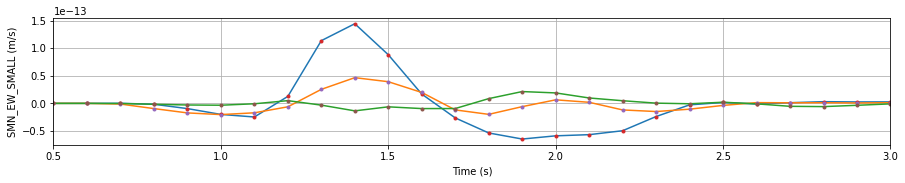

In [4]:
# To-do: set up the following matrix:
#       d G_0x  d G_0y  d G_0z  d G_0x  d G_0y  d G_0z    
# G_0 = ------, ------, ------, ------, ------, ------.
#        d x     d y     d z     d y     d z     d x
#       d G_1x  d G_1y  d G_1z  d G_1x  d G_1y  d G_1z    
# G_1 = ------, ------, ------, ------, ------, ------.
#        d x     d y     d z     d y     d z     d x
#       d G_2x  d G_2y  d G_2z  d G_2x  d G_2y  d G_2z    
# G_2 = ------, ------, ------, ------, ------, ------.
#        d x     d y     d z     d y     d z     d x

# g has the structure: [Force direction x Time steps x Ground displacement direction]
# e.g. [3 x 121 x 3]

# To perform the spatial derivatives, the Green's functions values at the neighbouring grid points
# must also be measured. For the 1st order central difference method, the grid points to the left
# and right must be measured as well, and the derivative taken by: f'(x) = (f(x+h) - f(x-h))/2h.
# Therefore, for each grid point, there are 8 other grid points of data to load for a total of 9!

G = np.zeros([len(t[0]), 3, len(STATIONS)])

for n in range(len(t[0])):
    G[n] = g[:, n, :].T # Note that: G[:, :, 0] == g[0, :, :]
    
# G has the structure: [Time steps x Ground displacement direction x Force direction]
# e.g. [121 x 3 x 3]
print("np.shape(G):",np.shape(G)) 

plt.figure(figsize = (15, 7/3))
plt.plot(t[0], g[0, :, :]) # Note that: G[:, :, 0] == g[0, :, :]
plt.plot(t[0], G[:, :, 0], ".") 
plt.ylabel("{} (m/s)".format(STATIONS[0]))
plt.xlabel("Time (s)")
plt.grid(True)
plt.xlim([0.5, 3.0])
plt.show()